In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [5]:
file_dir = "/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline/logfile"
file_list = [f for f in os.listdir(file_dir) if f.endswith('txt')]
cell_list = list(set([c.split('_')[1] for c in file_list]))
print(cell_list)
query_list = list(set([q.split('_')[2] for q in file_list]))
print(query_list)

['MCF7', 'PC3', 'A549']
['LeastConfidence', 'RandomSampling']


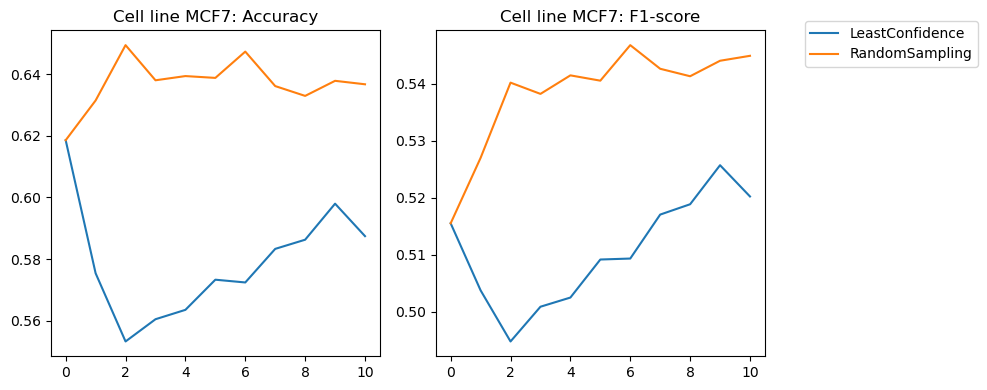

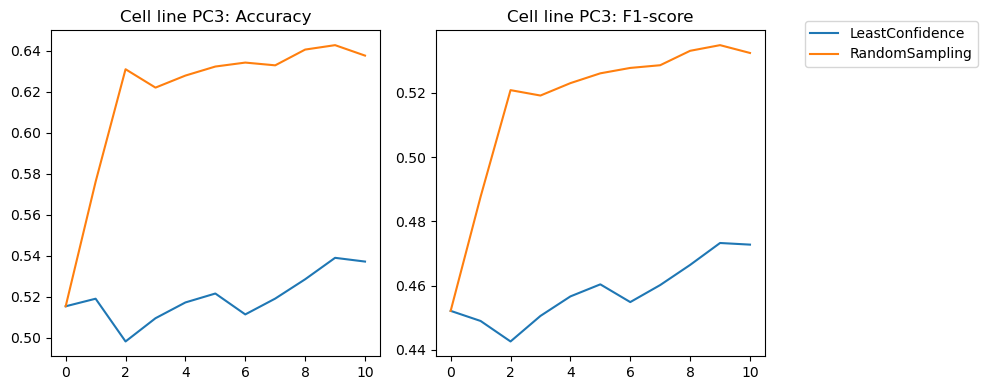

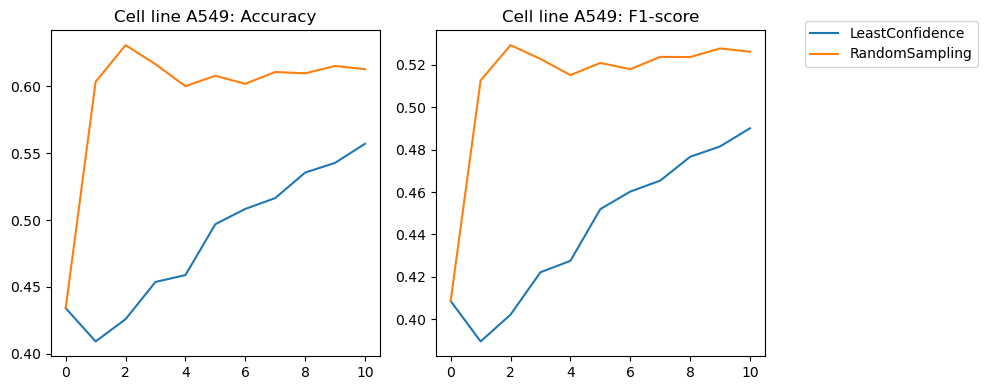

In [6]:
### double check with logfile
round_num = 11
def metrics_from_txt(fname):
    paragraph = []
    with open(fname) as f:
        for sentence in f.readlines():
            # print(sentence)
            if sentence.startswith('Round'):
                # print(sentence[:-1])
                if sentence == 'Round 0:\n':
                    paragraph.append(sentence[:-2])
                else:
                    paragraph.append(sentence[:-2])
            elif sentence.startswith('testing '):
                # print(sentence[:-1])
                paragraph.append(sentence[:-1])
            elif sentence.startswith('!!!!!total used time:'):
                time = float(sentence.split(' ')[-1])
    # print(paragraph)
    data_dict = {}
    for n in range(len(paragraph)//3):
        roundnum = paragraph[3*n].split()[1]
        acc = paragraph[3*n+1].split()
        f1 = paragraph[3*n+2].split()
        if int(roundnum) not in data_dict:
            data_dict[int(roundnum)] = {acc[1]:[float(acc[2])], f1[1]:[float(f1[2])]}
        elif int(roundnum) in data_dict:
            data_dict[int(roundnum)][acc[1]].append(float(acc[2]))
            data_dict[int(roundnum)][f1[1]].append(float(f1[2]))
    for n in range(round_num):
        data_dict[n]['accuracy'] = np.mean(data_dict[n]['accuracy'])
        data_dict[n]['F1'] = np.mean(data_dict[n]['F1'])
    df = pd.DataFrame.from_dict(data_dict).T
    # print(df)
    return df, time

for cell in cell_list:
    f_c = [f for f in file_list if cell in f]
    # print(f_c)
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    for query in query_list:
        f_qc = [f for f in f_c if query in f]
        if len(f_qc)!=1:
            print('wrong')
            continue
        f_qc = f_qc[0]
        try:
            df, time = metrics_from_txt(f'{file_dir}/{f_qc}')
        except: 
            continue
        x = df.index.to_list()
        acc = df.accuracy.to_list()
        f1 = df.F1.to_list()
        ax[0].plot(x, acc, label=query)
        ax[1].plot(x, f1, label=query)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    ax[0].set_title(f'Cell line {cell}: Accuracy')
    ax[1].set_title(f'Cell line {cell}: F1-score')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    